# COVID-19 

----

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

### Requirements

#### Exploratory Data Analysis
* [x] Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* [x] Grouping the data and analyzing the groups - using Pandas aggregate methods.
* [x] Work with features - handle missing data if needed, use pandas date APIs.
* [x] Manipulate datasets - use joins if needed.
* [x] Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* [x] Visualize data with dimensionality reduction algorithms.
- [x] Perform cluster analysis.
* [x] Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

#### Evaluation Criteria
- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- [x] Both PCA and T-SNE algorithms are used.


<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

### Getting started

In [878]:
# importing the necessary modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import math

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [879]:
# Load the data
# case = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Case.csv?token=AFU2SI6VUUPBE5YQYZMOLXC72HE3S")
patient = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/PatientInfo.csv?token=AFU2SI3MJJRN7U6ASU47T4C72HE2G")
# policy = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Policy.csv?token=AFU2SIY2DTJJUOJKVJ6FRHK72HGLI")
region = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Region.csv?token=AFU2SIYZDGW7DBUX7RYONTS72HGJU")
search_trend = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/SearchTrend.csv?token=AFU2SI6XXFGO6I7ZNW6SAUK72HGHU")
# seoul = pd.read_csv("https://github.com/TuringCollegeSubmissions/lcramw-DS.1.4/blob/master/SeoulFloating.csv.zip?raw=true")
# time = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Time.csv?token=AFU2SI3BAPSZX6HQDT4SZZ272HGFS")
# time_age = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeAge.csv?token=AFU2SI7BED77ELOCPDVT2YC72HGEU")
# time_gender = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeGender.csv?token=AFU2SIZMN7GXCQHJ5IHQIMK72HGC2")
# time_province = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeProvince.csv?token=AFU2SI2GS5CZLMYM2GSQP3272HGBS")
weather = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Weather.csv?token=AFU2SI7TOYZRPM5GX6JMVOC72HGAU")

In [3]:
# Loading extra data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-22-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-22-2020.csv')

### EDA

#### Exploring

In [475]:
# Checking patient df
patient.head(2)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released


In [476]:
# Checking shape
patient.shape

(5165, 14)

In [477]:
# Checking info for dtypes and null values
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [478]:
print("first Infected date in korea: ", patient['confirmed_date'][0])

first Infected date in korea:  2020-01-23


In [479]:
# Checking region df
region.head(2)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088


In [480]:
# Checking shape
region.shape

(244, 12)

In [481]:
# Checking info for dtypes and null values
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [496]:
# Checking weather df
weather.head(2)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,province_name
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0,Seoul
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1,Busan


In [489]:
# Checking shape
weather.shape

(26271, 11)

In [490]:
# Checking info for dtypes and null values
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
 10  province_name          26271 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.2+ MB


In [525]:
# Check the provinces
weather.province.value_counts()

Incheon              1642
Gwangju              1642
Daejeon              1642
Jeollanam-do         1642
Daegu                1642
Gyeongsangnam-do     1642
Gyeongsangbuk-do     1642
Ulsan                1642
Gangwon-do           1642
Gyeonggi-do          1642
Busan                1642
Jeollabuk-do         1642
Seoul                1642
Jeju-do              1642
Chungcheongnam-do    1641
Chungcheongbuk-do    1613
Chunghceongbuk-do      29
Name: province, dtype: int64

In [526]:
# Fix typo in province name 
weather['province'] = weather['province'].str.replace('Chunghceongbuk', 'Chungcheongbuk')

In [528]:
# Group by province
weather_grouped = weather.groupby(['province']).mean().round(1)
weather_grouped

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,,
Busan,11000,15.2,11.9,19.4,1.9,6.4,186.2,62.8
Chungcheongbuk-do,40000,12.1,6.5,18.4,1.3,3.9,149.3,65.0
Chungcheongnam-do,41000,12.3,7.3,17.8,1.2,4.8,192.7,75.3
Daegu,12000,14.3,9.4,19.8,1.3,5.0,208.8,60.3
Daejeon,15000,13.5,8.7,19.0,1.6,3.9,238.4,68.4
Gangwon-do,30000,13.9,9.9,18.3,1.5,5.0,234.8,55.6
Gwangju,13000,14.5,10.2,19.8,1.6,4.1,136.8,69.6
Gyeonggi-do,20000,12.8,8.0,18.4,1.5,4.5,221.8,68.9
Gyeongsangbuk-do,60000,13.5,8.8,19.1,1.3,6.1,180.5,62.5


In [630]:
# Checking weather df
search_trend.head(2)

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890


In [631]:
# Checking shape
search_trend.shape

(1642, 5)

In [632]:
# Checking info
search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


#### Visualizing

##### Search trends

In [ ]:
# Set date as index
search_trend.set_index('date', inplace=True)

In [ ]:
# Set as day for the plot
search_trend = search_trend.asfreq('D', method='pad')

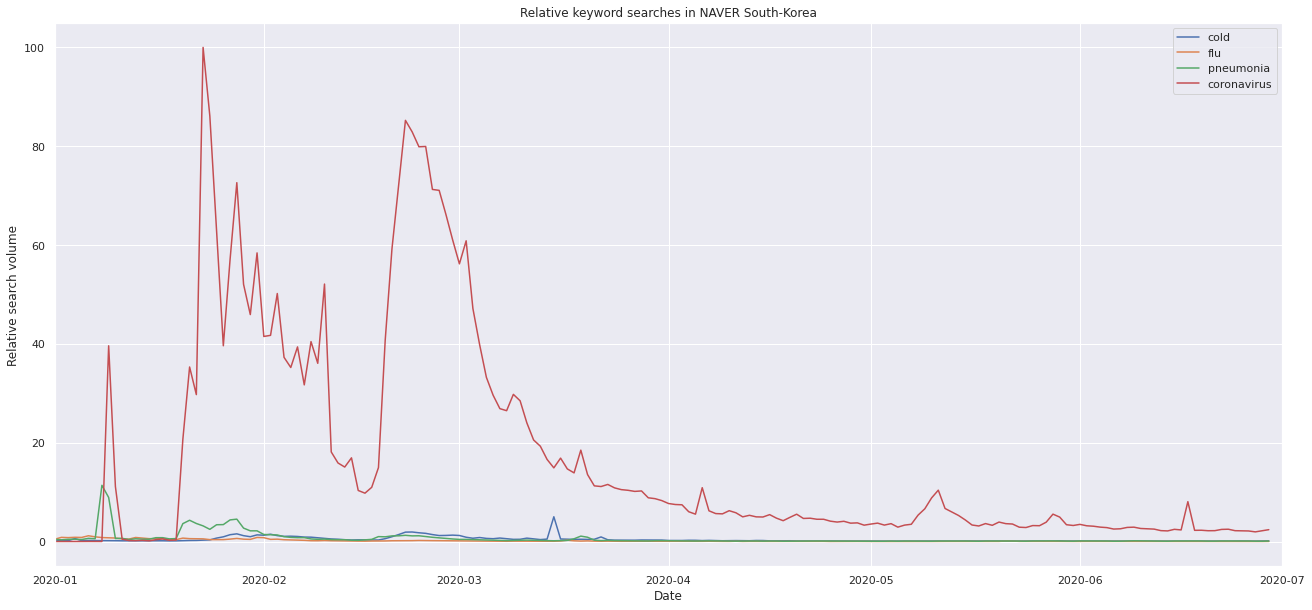

In [ ]:
# Plot search_trend
plt.figure(figsize=(22,10))
plt.plot(search_trend)

# Set axis settings and labels
plt.ylabel('Relative search volume');
plt.xlabel('Date');
plt.title('Relative keyword searches in NAVER South-Korea')
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01")))


# show a legend on the plot
plt.legend(labels=['cold', 'flu', 'pneumonia', 'coronavirus'])

##### Provinces

In [671]:
# Select columns from region df
region_province = region[['province','city','elementary_school_count','kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']]

In [672]:
# Merge with weather
province = region_province.merge(weather_grouped, how='left', on=['province'])

In [673]:
# Check province df
province.head()

,province,city,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,Seoul,Seoul,607,830,48,1.44,15.38,5.8,22739,13.0,8.8,18.0,1.4,4.5,210.3,57.7
1,Seoul,Gangnam-gu,33,38,0,4.18,13.17,4.3,3088,13.0,8.8,18.0,1.4,4.5,210.3,57.7
2,Seoul,Gangdong-gu,27,32,0,1.54,14.55,5.4,1023,13.0,8.8,18.0,1.4,4.5,210.3,57.7
3,Seoul,Gangbuk-gu,14,21,0,0.67,19.49,8.5,628,13.0,8.8,18.0,1.4,4.5,210.3,57.7
4,Seoul,Gangseo-gu,36,56,1,1.17,14.39,5.7,1080,13.0,8.8,18.0,1.4,4.5,210.3,57.7


In [674]:
# Drop korea because it's the total
province = province[province.province != 'Korea']

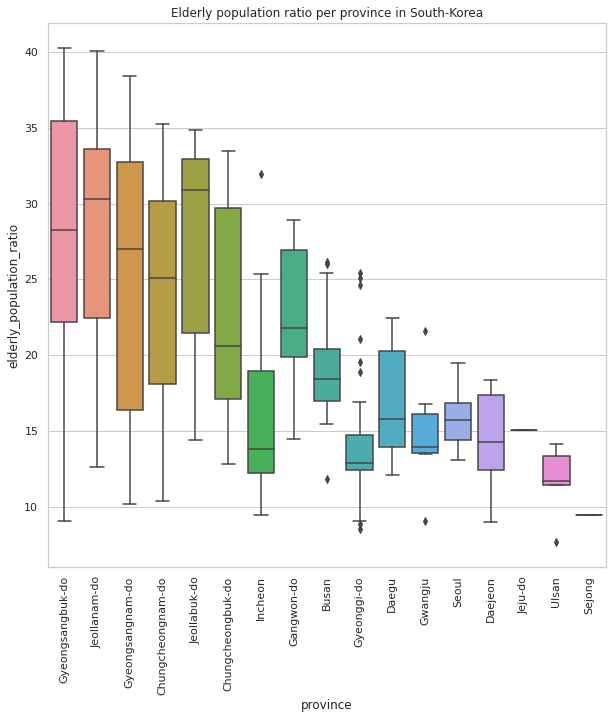

In [675]:
# Plot the elderly population ratio per province
plt.figure(figsize=(10,10))

province_sorted = province[['province', 'elderly_population_ratio']].sort_values(by='elderly_population_ratio', ascending=False)
sns.set(style="whitegrid")

sns.boxplot(data=province_sorted, x='province', y='elderly_population_ratio')
plt.xticks(rotation=90)
plt.title('Elderly population ratio per province in South-Korea')

plt.show()

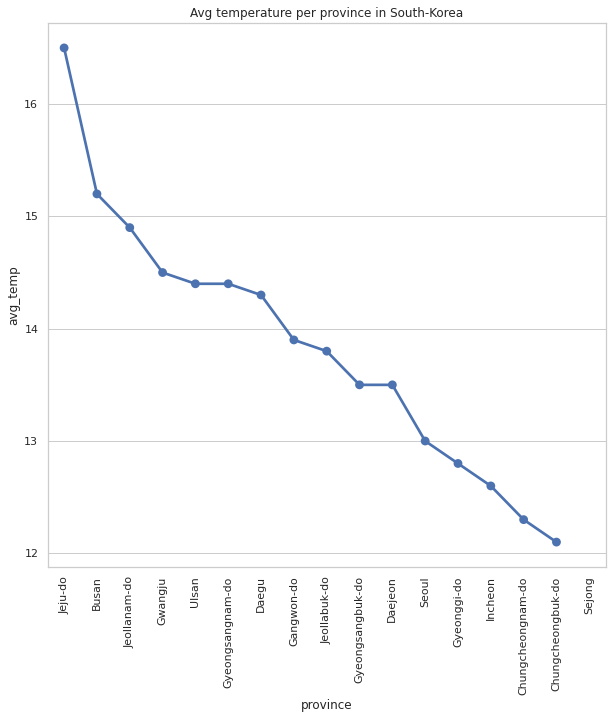

In [676]:
# Plot the avg temp per province
plt.figure(figsize=(10,10))

province_sorted_temp = province[['province', 'avg_temp']].sort_values(by='avg_temp', ascending=False)
sns.set(style="whitegrid")

sns.pointplot(data=province_sorted_temp, x='province', y='avg_temp')
plt.xticks(rotation=90)
plt.title('Avg temperature per province in South-Korea')

plt.show()

In [698]:
# Groupby province
province_df = province.groupby(['province']).mean().round(1)

In [702]:
# Get the mean, median and standard deviation for the variables
province_df.agg(['mean', 'std', 'median']).T

,mean,std,median
elementary_school_count,51.558824,18.886439,48.00
kindergarten_count,73.376471,26.891205,66.70
university_count,2.900000,1.213981,2.60
academy_ratio,1.417647,0.414179,1.40
elderly_population_ratio,19.194118,5.894009,17.00
elderly_alone_ratio,9.529412,4.158690,8.00
nursing_home_count,762.958824,411.748625,600.30
avg_temp,13.856250,1.162737,13.85
min_temp,9.656250,1.809961,9.40
max_temp,18.775000,0.900000,19.05


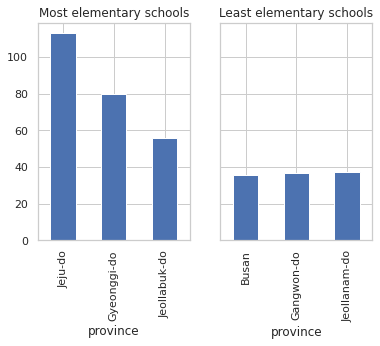

In [744]:
# Plot provinces with most/least elementary schools
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.elementary_school_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.elementary_school_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most elementary schools')
ax[1].set_title('Least elementary schools')
plt.show()

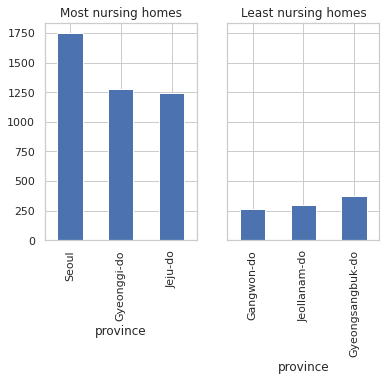

In [745]:
# Plot provinces with most/least nursing homes
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.nursing_home_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.nursing_home_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most nursing homes')
ax[1].set_title('Least nursing homes')
plt.show()

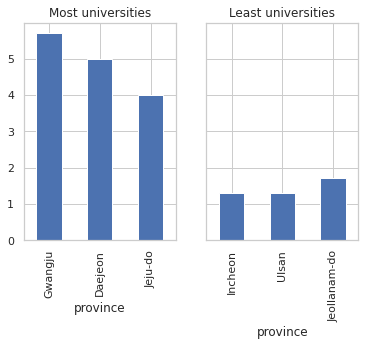

In [746]:
# Plot provinces with most/least universities
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.university_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.university_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most universities')
ax[1].set_title('Least universities')
plt.show()

##### Patients

In [760]:
# Get aggregated states
agg = patient[['state','patient_id']].groupby('state').count().reset_index().sort_values(by = 'patient_id')

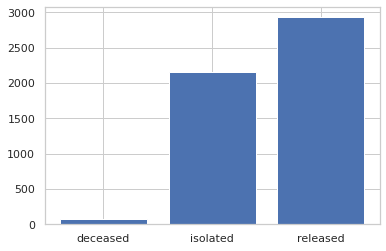

In [761]:
# Plot the aggregated states
plt.bar(x=list(agg['state']), height=list(agg['patient_id']))
plt.show()

In [784]:
# Drop NaN
patient.dropna(subset=['infection_case'], inplace=True)

In [785]:
# Aggregate/group some infection cases
patient.loc[patient['infection_case'].str.contains('church', case=False), 'infection_case'] = 'church'
patient.loc[patient['infection_case'].str.contains('nursing home', case=False), 'infection_case'] = 'nursing home'
patient.loc[patient['infection_case'].str.contains('hospital', case=False), 'infection_case'] = 'hospital'
patient.loc[patient['infection_case'].str.contains('gym', case=False), 'infection_case'] = 'gym'
patient.loc[patient['infection_case'].str.contains('town', case=False), 'infection_case'] = 'town'
patient.loc[patient['infection_case'].str.contains('center', case=False), 'infection_case'] = 'center'
patient.loc[patient['infection_case'].str.contains('club', case=False), 'infection_case'] = 'club'

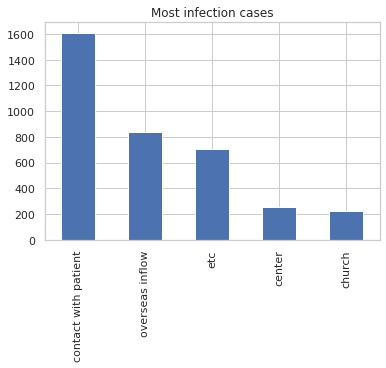

In [787]:
# Plot infection cases
patient.infection_case.value_counts().nlargest(5).plot(kind='bar')
plt.title('Most infection cases')
plt.show()

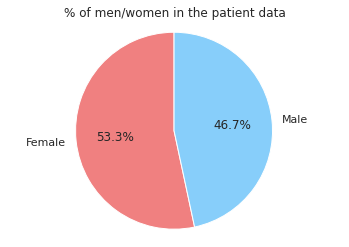

In [794]:
# Get % of gender
sizes = patient.sex.value_counts(normalize=True).tolist()

# Pie chart
labels = 'Female', 'Male'

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal') 
plt.title('% of men/women in the patient data', loc='center')

plt.show()

In [791]:
# Get gender counts per state
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    997
        isolated    704
        deceased     12
male    released    875
        isolated    600
        deceased     23
Name: state, dtype: int64

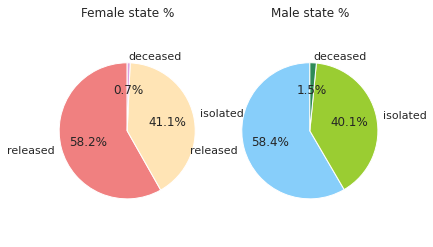

In [799]:
# Set counts per state in list
states_list = gender.state.value_counts(normalize=True).tolist()

# Pie chart
labels = 'released', 'isolated', 'deceased'
colors = ['lightcoral', 'moccasin', 'plum']
colors_male = ['lightskyblue', 'yellowgreen', 'seagreen']

fig, ax = plt.subplots(1, 2)
ax[0].pie(states_list[0:3], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].axis('equal') 
ax[0].set_title('Female state %')

ax[1].pie(states_list[3:6], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_male)
ax[1].axis('equal') 
ax[1].set_title('Male state %')

plt.show()

#### Merging

In [902]:
# Create full features DF
full_features_df = patient.merge(region, how='left', on=['province', 'city'])

In [903]:
# Drop unneccesary columns
full_features_df.drop(columns=['patient_id', 'confirmed_date', 'contact_number', 'infected_by', 'latitude', 'longitude', 'code', 'deceased_date', 'symptom_onset_date', 'released_date'], inplace=True)

In [904]:
# Reset index and view the head of full_features_df
full_features_df = full_features_df.reset_index(drop=True)
full_features_df.head()

,sex,age,country,province,city,infection_case,state,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,released,36.0,56.0,1.0,1.17,14.39,5.7,1080.0
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,released,23.0,31.0,1.0,0.70,16.65,6.9,689.0
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,released,13.0,17.0,3.0,1.71,18.27,6.8,668.0
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,released,22.0,24.0,2.0,1.83,14.05,4.9,929.0
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,released,29.0,49.0,6.0,1.02,16.15,6.0,729.0


In [905]:
# Remove s' from age 
full_features_df['age'] = full_features_df['age'].str.replace('s', '')

# Set as float to handle NaN
full_features_df['age'] = full_features_df['age'].astype(float)

In [906]:
# Check the info
full_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       4043 non-null   object 
 1   age                       3785 non-null   float64
 2   country                   5165 non-null   object 
 3   province                  5165 non-null   object 
 4   city                      5071 non-null   object 
 5   infection_case            4246 non-null   object 
 6   state                     5165 non-null   object 
 7   elementary_school_count   4946 non-null   float64
 8   kindergarten_count        4946 non-null   float64
 9   university_count          4946 non-null   float64
 10  academy_ratio             4946 non-null   float64
 11  elderly_population_ratio  4946 non-null   float64
 12  elderly_alone_ratio       4946 non-null   float64
 13  nursing_home_count        4946 non-null   float64
dtypes: float

In [907]:
# Get the mean age per state
grouped_age = full_features_df.groupby('state').mean()
grouped_age.age

state
deceased    70.400000
isolated    41.732673
released    38.803042
Name: age, dtype: float64

In [908]:
# Get the mean age per state
grouped_age

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
state,,,,,,,,
deceased,70.400000,25.672727,44.600000,5.727273,1.236727,20.512364,9.967273,394.745455
isolated,41.732673,46.641537,81.057879,2.378405,1.474222,14.678230,6.364494,959.011187
released,38.803042,33.627160,53.163668,3.862081,1.461358,16.857009,7.553792,690.527690


In [909]:
# Create dataframes for each state
deceased = full_features_df.query('state == "deceased"')
isolated = full_features_df.query('state == "isolated"')
released = full_features_df.query('state == "released"')

print(f'{deceased.shape}, {isolated.shape}, {released.shape}')

(78, 14), (2158, 14), (2929, 14)


In [910]:
# Impute age based on age state mean
deceased.age = deceased.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))
isolated.age = isolated.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))
released.age = released.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [911]:
# Create full_df dataframe again with imputed values
full_df = pd.concat([deceased, isolated, released])
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 12 to 5161
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       4043 non-null   object 
 1   age                       5165 non-null   float64
 2   country                   5165 non-null   object 
 3   province                  5165 non-null   object 
 4   city                      5071 non-null   object 
 5   infection_case            4246 non-null   object 
 6   state                     5165 non-null   object 
 7   elementary_school_count   4946 non-null   float64
 8   kindergarten_count        4946 non-null   float64
 9   university_count          4946 non-null   float64
 10  academy_ratio             4946 non-null   float64
 11  elderly_population_ratio  4946 non-null   float64
 12  elderly_alone_ratio       4946 non-null   float64
 13  nursing_home_count        4946 non-null   float64
dtypes: floa

In [912]:
# Drop NaN values
full_df.dropna(subset=['sex', 'age', 'country', 'province', 'city', 'infection_case', 'elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count'], inplace=True)
full_df = full_df.reset_index(drop=True)

# Check info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       3080 non-null   object 
 1   age                       3080 non-null   float64
 2   country                   3080 non-null   object 
 3   province                  3080 non-null   object 
 4   city                      3080 non-null   object 
 5   infection_case            3080 non-null   object 
 6   state                     3080 non-null   object 
 7   elementary_school_count   3080 non-null   float64
 8   kindergarten_count        3080 non-null   float64
 9   university_count          3080 non-null   float64
 10  academy_ratio             3080 non-null   float64
 11  elderly_population_ratio  3080 non-null   float64
 12  elderly_alone_ratio       3080 non-null   float64
 13  nursing_home_count        3080 non-null   float64
dtypes: float

In [913]:
# Check distribution states
full_df.state.value_counts()

released    1792
isolated    1256
deceased      32
Name: state, dtype: int64

In [914]:
# Check distribution gender
full_df.sex.value_counts()

female    1653
male      1427
Name: sex, dtype: int64

In [915]:
# Check distribution provinces
full_df.province.value_counts()

Gyeonggi-do          828
Seoul                542
Gyeongsangbuk-do     539
Incheon              333
Chungcheongnam-do    167
Busan                139
Gyeongsangnam-do     129
Daejeon              118
Gangwon-do            63
Chungcheongbuk-do     56
Ulsan                 53
Sejong                50
Jeollabuk-do          18
Daegu                 17
Jeju-do               14
Jeollanam-do          14
Name: province, dtype: int64

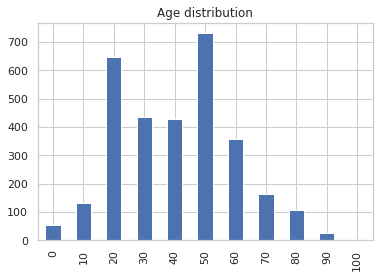

In [916]:
# Function for rounding to nearest 10th
def roundup(num):
    return int(math.ceil(num / 10.0)) * 10


# Round all ages in full_df.age
empty_list = []
for number in full_df.age:
  empty_list.append(roundup(number))


# df with rounded age
df_rounded = pd.DataFrame(data=empty_list, columns=['age'])

# Plot age distribution
df_rounded.age.value_counts().sort_index().plot(kind='bar')

plt.title('Age distribution')
plt.show()

### Statistical testing

In [ ]:
patient.sex.value_counts()

female    2218
male      1825
Name: sex, dtype: int64

In [ ]:
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    1402
        isolated     788
        deceased      28
male    released    1112
        isolated     666
        deceased      47
Name: state, dtype: int64

In [208]:
patient['age'] = patient['age'].str.replace('s', '')
patient['age'] = patient['age'].astype(int)

In [201]:
patient.dropna(subset=['age'], inplace=True)

In [203]:
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    1394
        isolated     646
        deceased      28
male    released    1103
        isolated     564
        deceased      47
Name: state, dtype: int64

In [215]:
# age
gender.agg({"age": [np.mean, np.std, np.size]})

age                 
             mean        std  size
sex                               
female  42.567698  20.229280  2068
male    37.736289  19.850827  1714

In [210]:
import statsmodels.api as sm

# Z-Test CTR
print(sm.stats.ztest(patient[patient['sex'] == 'female'].age, patient[patient['sex'] == 'male'].age)) # prints test statistic, p-value

(7.37380757644738, 1.6582248370749386e-13)


Parametric test assumptions

*   Independence: Meaning that each observation is independent of another; if there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time.
*   Population distributions are normal: The normality assumption is applied differently depending on the statistical method being used. For example, it applies to the shape of the sampling distribution for the dependent variable (outcome variable).
*   Samples have equal variances

Since clusters are already different (point of clustering), let's see if one variable is different form the population

In [33]:
# Create dataframes for each cluster
cluster_1 = full_features_df.query('cluster == 1')
cluster_2 = full_features_df.query('cluster == 2')
cluster_3 = full_features_df.query('cluster == 3')

In [44]:
np.var(cluster_1.elderly_population_ratio)

3.236025959153197

In [45]:
np.var(cluster_2.elderly_population_ratio)

28.89441501781002

In [46]:
np.var(cluster_3.elderly_population_ratio)

7.553226950501664

In [34]:
# Check bartlett's equality of variance test
stats.bartlett(cluster_1['elderly_population_ratio'],
               cluster_2['elderly_population_ratio'],
               cluster_3['elderly_population_ratio'])

BartlettResult(statistic=975.6649699176323, pvalue=1.3710196813142527e-212)

Heteroskedasticity!

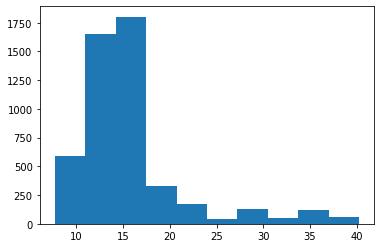

In [35]:
# Check overall population for normality
pyplot.hist(full_features_df.elderly_population_ratio)
pyplot.show()

Text(0.5, 1.0, 'Cluster 3')

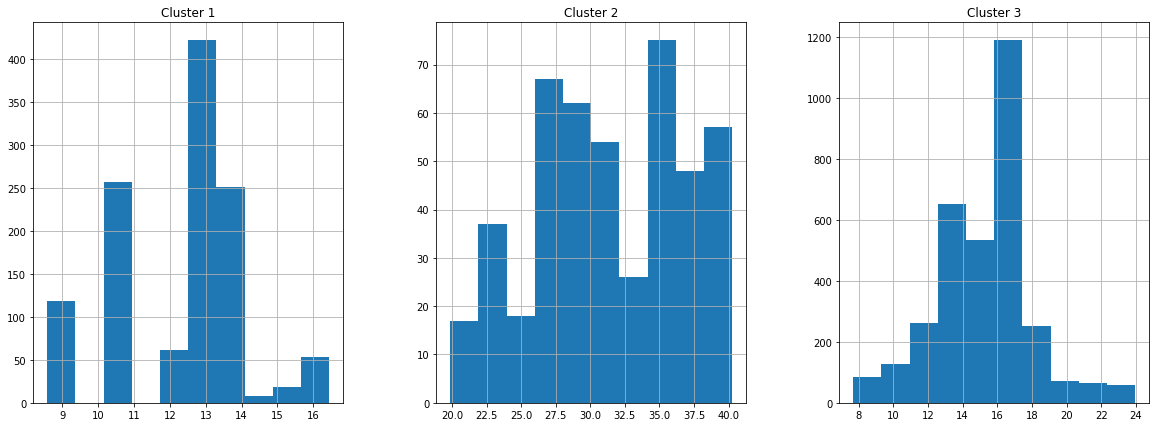

In [36]:
# Plot clusters to check for normality
fig, axes = plt.subplots(1, 3, figsize=(20,7))

cluster_1.hist('elderly_population_ratio', ax=axes[0])
cluster_2.hist('elderly_population_ratio', ax=axes[1])
cluster_3.hist('elderly_population_ratio', ax=axes[2])
axes[0].set_title('Cluster 1')
axes[1].set_title('Cluster 2')
axes[2].set_title('Cluster 3')

In [37]:
pip install researchpy

In [38]:
import researchpy as rp
rp.summary_cont(full_features_df['elderly_population_ratio'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,elderly_population_ratio,4946.0,15.992,5.8746,0.0835,15.8282,16.1557


In [39]:
rp.summary_cont(full_features_df['elderly_population_ratio'].groupby(full_features_df['cluster']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster,,,,,,
1,1189,12.2503,1.7997,0.0522,12.1479,12.3527
2,461,31.4243,5.3812,0.2506,30.9318,31.9169
3,3296,15.1832,2.7487,0.0479,15.0894,15.2771


In [40]:
stats.f_oneway(full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 1],
               full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 2],
               full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 3],)

F_onewayResult(statistic=7555.641862365667, pvalue=0.0)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('elderly_population_ratio ~ C(cluster)', data=full_features_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cluster),128592.335559,2.0,7555.641862,0.0
Residual,42063.396217,4943.0,NaN,NaN


In [42]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(cluster),128592.335559,2.0,64296.16778,7555.641862,0.0,0.753519,0.753382
Residual,42063.396217,4943.0,8.50969,NaN,NaN,NaN,NaN


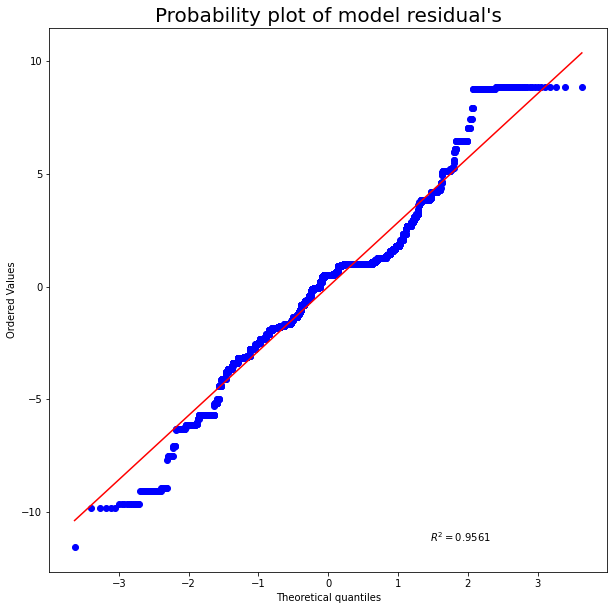

In [43]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

### Modeling

#### PCA

In [917]:
# Leave out state
features = ['elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']
       
# Separating out the features
x = full_df.loc[:, features].values

# Separating out the target
y = full_df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [919]:
# Visualise the standardised data (Just for simplicity)
see_x = pd.DataFrame(data=x, columns=features)
see_x.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,-1.153909,-1.105194,0.134567,0.332186,0.417772,-0.079591,-0.254035
1,-0.789633,-0.953647,-0.282401,0.542250,-0.286058,-0.558577,0.182914
2,-0.384882,-0.542306,0.134567,0.174638,0.541192,0.399395,0.278339
3,-0.384882,-0.542306,0.134567,0.174638,0.541192,0.399395,0.278339
4,-0.101556,0.215427,0.134567,0.507239,-0.619626,-0.558577,0.507695


In [920]:
# While applying StandardScaler, each feature of your data should be normally 
# distributed such that it will scale the distribution to a mean of zero
# and a standard deviation of one.
np.mean(x),np.std(x)

(2.372869989551355e-17, 1.0)

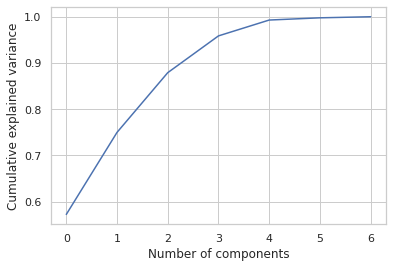

In [921]:
# Plot the explained variance per component added
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [922]:
# 2 PCA components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [923]:
# Check the head()
principal_df.head()

,principal component 1,principal component 2
0,1.055859,0.781914
1,0.220503,1.352708
2,0.572342,0.045917
3,0.572342,0.045917
4,-0.919429,0.554400


In [925]:
# Concatenate and view head()
final_df_pca = pd.concat([principal_df[['principal component 1', 'principal component 2']], full_df[['state']]], axis = 1)
final_df_pca.head()

,principal component 1,principal component 2,state
0,1.055859,0.781914,deceased
1,0.220503,1.352708,deceased
2,0.572342,0.045917,deceased
3,0.572342,0.045917,deceased
4,-0.919429,0.554400,deceased


<Figure size 720x720 with 0 Axes>

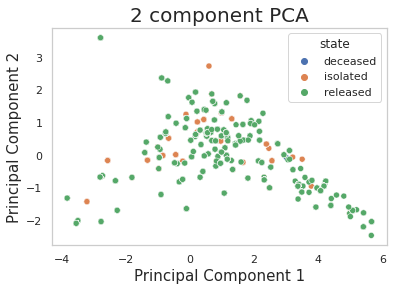

In [929]:
# Scatterplot 
fig = plt.figure(figsize = (10,10))

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(x=final_df_pca['principal component 1'], y=final_df_pca['principal component 2'], hue=final_df_pca.state)

ax.grid()

In [930]:
# Explained variance of the components
pca.explained_variance_ratio_

array([0.57229201, 0.17748348])

#### T-SNE

In [931]:
# Initialise T-SNE and set 2 components
tsne = TSNE(n_components=2, random_state=0)

In [932]:
# Feed the features dataset 
tsne_obj= tsne.fit_transform(x)

In [933]:
# View the head()
tsne_df = pd.DataFrame(data = tsne_obj
             , columns = ['X', 'Y'])

tsne_df.head()

,X,Y
0,7.317872,16.073278
1,12.674182,27.831255
2,13.054370,18.431116
3,13.054367,18.431164
4,-54.552574,-11.377718


In [934]:
# Concatenate and view again
final_tsne_df = pd.concat([tsne_df, full_df[['state']]], axis = 1)
final_tsne_df.head()

,X,Y,state
0,7.317872,16.073278,deceased
1,12.674182,27.831255,deceased
2,13.054370,18.431116,deceased
3,13.054367,18.431164,deceased
4,-54.552574,-11.377718,deceased


<Figure size 576x576 with 0 Axes>

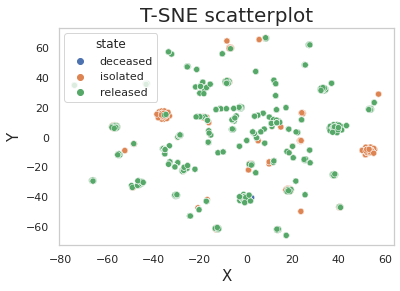

In [935]:
# T-SNE scatterplot
fig = plt.figure(figsize = (8,8))

fig, ax = plt.subplots()

ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_title('T-SNE scatterplot', fontsize = 20)

sns.scatterplot(x="X", y="Y", hue="state", data=final_tsne_df);
ax.grid()

#### Kmeans clustering

In [936]:
# Calculate the within cluster SSE (distortion)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df)
    distortions.append(kmeanModel.inertia_)

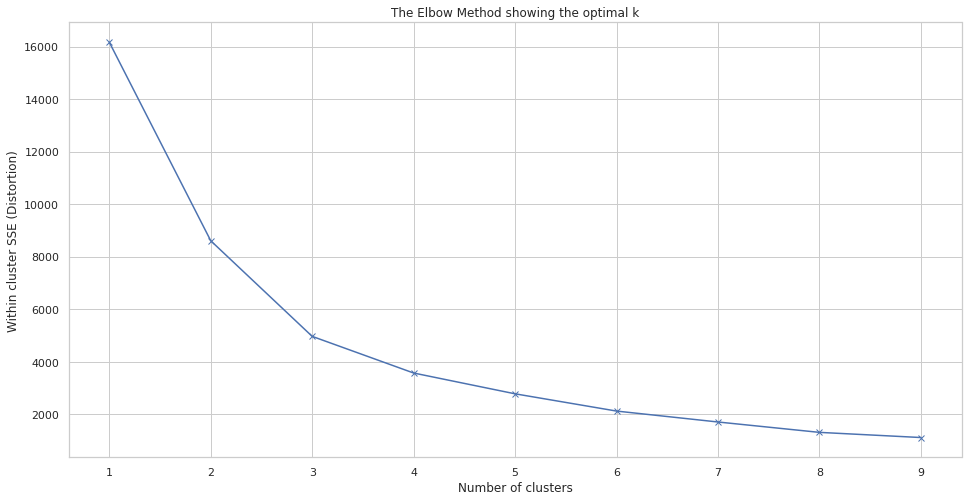

In [937]:
# Plot the elbow figure
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE (Distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [938]:
pip install kneed

In [939]:
# Installing kneed
from kneed import DataGenerator, KneeLocator

In [940]:
# Using kneed to programmatically check elbow point
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
kl.elbow

3

In [941]:
# Fit and predict the Kmeans model
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(principal_df)
y_kmeans = kmeanModel.predict(principal_df)

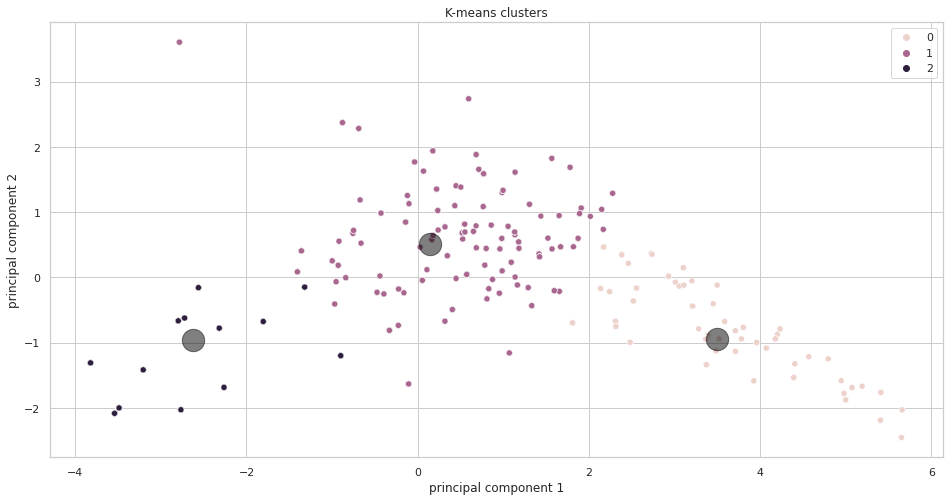

In [942]:
# plot points
plt.figure(figsize=(16,8))
plt.title('K-means clusters')

sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2', hue=y_kmeans)


# plot cluster centers
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [944]:
# Add column for cluster labels
full_df['cluster'] = kmeanModel.labels_

In [945]:
# change clusters to 1 - 3 instead of 0 - 2
full_df['cluster'] = full_df['cluster'].map({0:1, 1:2, 2:3}) 

In [946]:
# Group by cluster
grouped_by_cluster = full_df.groupby('cluster')

In [947]:
# Get the percentages of states in each cluster
df = pd.concat([grouped_by_cluster.state.value_counts(), 
                grouped_by_cluster.state.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

df.round(2)

counts  percentage
cluster state                       
1       released     302       72.60
        isolated      99       23.80
        deceased      15        3.61
2       released    1271       63.45
        isolated     715       35.70
        deceased      17        0.85
3       isolated     442       66.87
        released     219       33.13

Seems like the highest percentage of deceased patients are in cluster 1, but the highest absolute number of deceased patients is in cluster 2.

In [948]:
grouped_by_cluster.mean()

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
cluster,,,,,,,,
1,44.408389,18.278846,22.528846,1.014423,0.934231,28.547428,15.876442,154.507212
2,40.527412,33.166251,53.388917,2.371942,1.545272,14.251742,5.956665,720.429356
3,35.052950,81.409985,141.122542,4.649017,1.813177,12.306581,5.114372,1539.346445


It seems that cluster 1 has a higher percentage of `elderly_population_ratio` and `elderly_alone_ratio` compared to the other 2 clusters. The cluster also has the lowest number of nursing homes compared to the other 2 clusters and the highest average age.

#### linear regression

In [949]:
# Add categorised values
full_df['state_cat'] = full_df['state'].astype('category').cat.codes

In [950]:
# Get all interesting features for linear regression
features_lin = ['age','sex', 'infection_case', 'country', 'province', 'city', 'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']

In [951]:
# Set X as df
X = full_df[features_lin]

In [952]:
# Set dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,sex_male,infection_case_Bonghwa Pureun Nursing Home,infection_case_Changnyeong Coin Karaoke,infection_case_Cheongdo Daenam Hospital,infection_case_Coupang Logistics Center,infection_case_Dongan Church,infection_case_Dunsan Electronics Town,infection_case_Eunpyeong St. Mary's Hospital,infection_case_Geochang Church,infection_case_Guro-gu Call Center,infection_case_Gyeongsan Cham Joeun Community Center,infection_case_Gyeongsan Jeil Silver Town,infection_case_Gyeongsan Seorin Nursing Home,infection_case_Itaewon Clubs,infection_case_KB Life Insurance,infection_case_Milal Shelter,infection_case_Ministry of Oceans and Fisheries,infection_case_Onchun Church,infection_case_Orange Town,infection_case_Pilgrimage to Israel,infection_case_Richway,infection_case_River of Grace Community Church,infection_case_SMR Newly Planted Churches Group,infection_case_Samsung Fire & Marine Insurance,infection_case_Seongdong-gu APT,infection_case_Seoul City Hall Station safety worker,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,...,city_Sejong,city_Seo-gu,city_Seocheon-gun,city_Seocho-gu,city_Seodaemun-gu,city_Seongbuk-gu,city_Seongdong-gu,city_Seongju-gun,city_Seongnam-si,city_Seosan-si,city_Siheung-si,city_Sokcho-si,city_Songpa-gu,city_Suncheon-si,city_Suseong-gu,city_Suwon-si,city_Suyeong-gu,city_Taean-gun,city_Taebaek-si,city_Uijeongbu-si,city_Uiseong-gun,city_Uiwang-si,city_Ulju-gun,city_Wonju-si,city_Yangcheon-gu,city_Yangju-si,city_Yangsan-si,city_Yecheon-gun,city_Yeongcheon-si,city_Yeongdeok-gun,city_Yeongdeungpo-gu,city_Yeongju-si,city_Yeongwol-gun,city_Yeongyang-gun,city_Yeonje-gu,city_Yeonsu-gu,city_Yeosu-si,city_Yongin-si,city_Yongsan-gu,city_Yuseong-gu
0,80.0,13.0,17.0,3.0,1.71,18.27,6.8,668.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40.0,22.0,24.0,2.0,1.83,14.05,4.9,929.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70.0,32.0,43.0,3.0,1.62,19.01,8.7,986.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,32.0,43.0,3.0,1.62,19.01,8.7,986.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.0,39.0,78.0,3.0,1.81,12.05,4.9,1123.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [427]:
# Set all columns incl dummy variables as features_x
features_x = X.columns

In [953]:
# X = StandardScaler().fit_transform(X)

y = full_df[['state_cat']]

In [954]:
# Set train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit linear regression
model_lin = LinearRegression().fit(X_train,y_train)

In [955]:
# Predictions
predictions = model_lin.predict(X_test)

In [966]:
r_sq = model_lin.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6606278340437738


In [967]:
r_sq_train = model_lin.score(X_train, y_train)
print('coefficient of determination:', r_sq_train)

coefficient of determination: 0.6661345556527396


In [956]:
# Get summary
X_train_Sm= sm.add_constant(X_train)
X_test_Sm= sm.add_constant(X_test)
ls=sm.OLS(y_test,X_test_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              state_cat   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     9.323
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.77e-78
Time:                        14:55:13   Log-Likelihood:                -21.657
No. Observations:                 616   AIC:                             359.3
Df Residuals:                     458   BIC:                             1058.
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [957]:
# Map the states
mapped_states = dict( enumerate(full_df['state'].astype('category').cat.categories))

In [958]:
# Set prediction as dataframe
predicted_df = pd.DataFrame(predictions.astype('int'), columns=['predicted'])

In [959]:
# Add the predicted state
predicted_df['predicted_state'] = predicted_df['predicted'].map(mapped_states)
predicted_df.head()

,predicted,predicted_state
0,1,isolated
1,1,isolated
2,1,isolated
3,1,isolated
4,1,isolated


In [960]:
# Reset the index for y_test
y_test = y_test.reset_index(drop=True)
y_test.head()

,state_cat
0,2
1,2
2,2
3,2
4,2


In [961]:
# Check with actual state
predicted_final_df = pd.concat([predicted_df, y_test[['state_cat']]], axis=1)
predicted_final_df.tail()

,predicted,predicted_state,state_cat
611,1,isolated,2
612,0,deceased,1
613,2,released,2
614,1,isolated,1
615,1,isolated,1


In [962]:
# 
predicted_final_df['state'] = predicted_final_df['state_cat'].map(mapped_states)

In [963]:
# Check predicted_final_df
predicted_final_df.tail()

,predicted,predicted_state,state_cat,state
611,1,isolated,2,released
612,0,deceased,1,isolated
613,2,released,2,released
614,1,isolated,1,isolated
615,1,isolated,1,isolated


In [964]:
# Count values
predicted_counts = pd.DataFrame(predicted_final_df.state.value_counts())
predicted_counts['predicted'] = predicted_final_df.predicted_state.value_counts()

predicted_counts

,state,predicted
released,374,108
isolated,235,443
deceased,7,65


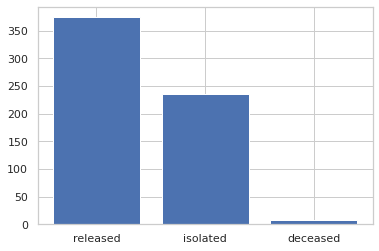

In [965]:
# Categorical data: Country names
countries = ['released', 'isolated', 'deceased']
# Integer value interms of death counts
actual = [374, 235, 7]
predicted = [108, 443, 65]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(countries, actual)
# Displaying the bar plot
plt.show()

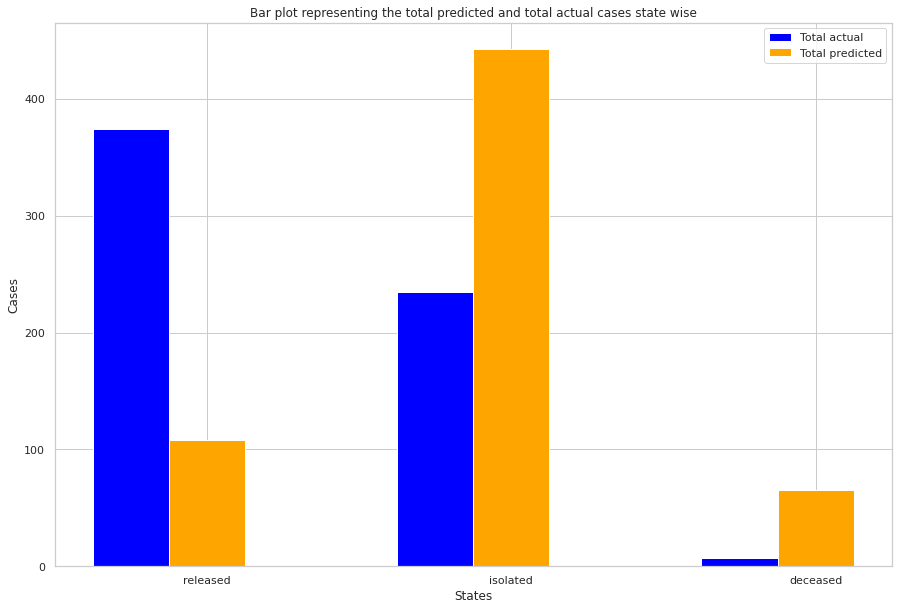

In [384]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[15, 10])

# Using numpy to group 3 different data with bars
X = np.arange(len(actual))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, actual, color = 'blue', width = 0.25)
plt.bar(X + 0.25, predicted, color = 'orange', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Total actual', 'Total predicted'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], countries)
# Giving the tilte for the plot
plt.title("Bar plot representing the total predicted and total actual cases state wise")
# Namimg the x and y axis
plt.xlabel('States')
plt.ylabel('Cases')
# Displaying the bar plot
plt.show()

#### correlation

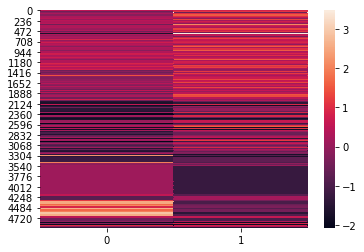

In [ ]:
sns.heatmap(data=x)